## Task 1 iscancerous

## Loading the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

In [ ]:
#conda install -c conda-forge opencv

## Reading the data 

In [ ]:
import zipfile
with zipfile.ZipFile('./image_classification_data.zip', 'r') as zip_ref:
    zip_ref.extractall('./')
    

In [ ]:
maindata = pd.read_csv('./image_classification_data/data_labels_mainData.csv')
extradata = pd.read_csv('./image_classification_data/data_labels_extraData.csv')

In [ ]:
image_folder = "image_classification_data/patch_images/"


In [ ]:
#Adding image path to the dataframe
maindata['image_path'] = image_folder + maindata['ImageName']
extradata['image_path'] = image_folder + extradata['ImageName']


In [ ]:
maindata.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,image_classification_data/patch_images/22409.png


In [ ]:
extradata.head()

,InstanceID,patientID,ImageName,isCancerous,image_path
0,12681,61,12681.png,0,image_classification_data/patch_images/12681.png
1,12682,61,12682.png,0,image_classification_data/patch_images/12682.png
2,12683,61,12683.png,0,image_classification_data/patch_images/12683.png
3,12684,61,12684.png,0,image_classification_data/patch_images/12684.png
4,12685,61,12685.png,0,image_classification_data/patch_images/12685.png


## Combining the two datasets

In [ ]:
data = maindata.append(extradata)

In [ ]:
data.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,image_path
0,22405,1,22405.png,fibroblast,0.0,0,image_classification_data/patch_images/22405.png
1,22406,1,22406.png,fibroblast,0.0,0,image_classification_data/patch_images/22406.png
2,22407,1,22407.png,fibroblast,0.0,0,image_classification_data/patch_images/22407.png
3,22408,1,22408.png,fibroblast,0.0,0,image_classification_data/patch_images/22408.png
4,22409,1,22409.png,fibroblast,0.0,0,image_classification_data/patch_images/22409.png


In [ ]:
#Storing the image data in a list
def load_image(path):
    with Image.open(path) as img:
        return img

images = [load_image(path) for path in data['image_path']]

In [ ]:
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=27x27>,
 <PIL.Pn

pip install --upgrade Pillow

## Exploratory Data Analysis

In [ ]:
#Checking for missing values in the combined dataset

cellType and cellTypeName have missing values as second dataset did not have these variables

In [ ]:
data.isnull().sum()

InstanceID          0
patientID           0
ImageName           0
cellTypeName    10384
cellType        10384
isCancerous         0
image_path          0
dtype: int64

In [ ]:
data.cellTypeName.value_counts() #The value of cellTypeName is divided exactly into 4

epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: cellTypeName, dtype: int64

In [ ]:
data.cellType.value_counts() #The value of cellTypeName is divided exactly into 4

2.0    4079
1.0    2543
0.0    1888
3.0    1386
Name: cellType, dtype: int64

In [ ]:
data.isCancerous.value_counts() #The value of isCancerous is in to two parts 

0    13211
1     7069
Name: isCancerous, dtype: int64

<AxesSubplot:>

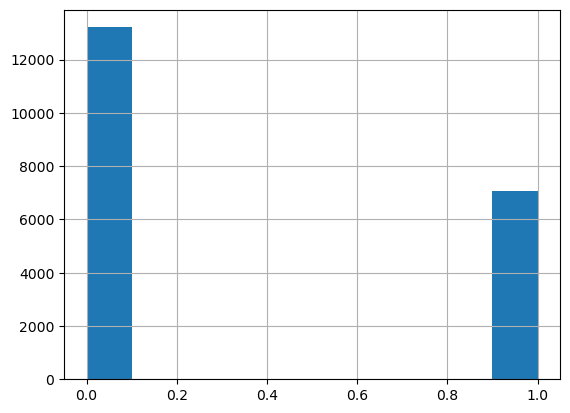

In [ ]:
data.isCancerous.hist()

<AxesSubplot:>

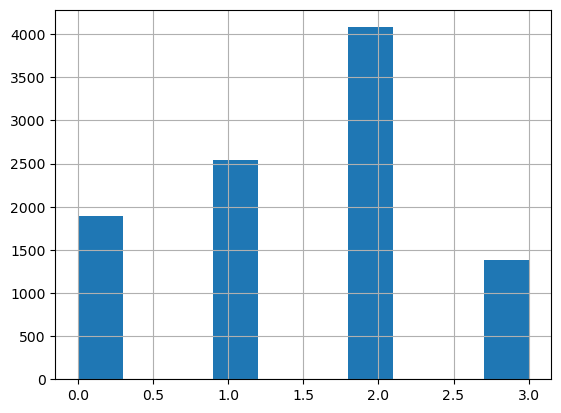

In [ ]:
data.cellType.hist()

In [ ]:
data.patientID.value_counts().max()

699

In [ ]:
data.patientID.value_counts().min()

6

<AxesSubplot:>

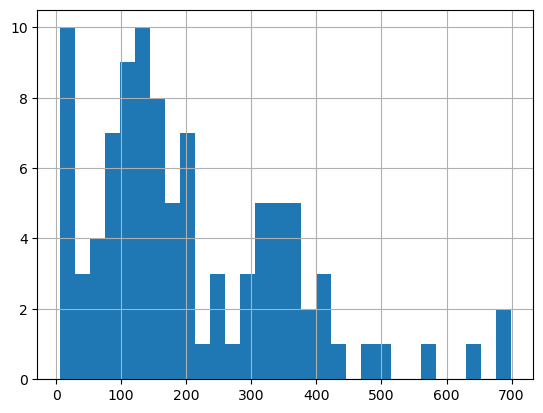

In [ ]:
data.patientID.value_counts().hist(bins=30)

One patient in the dataset can have images ranging from 6 to 699

- dropping instance id as it is not relevant to the findings
- dropping cellType and cellTypename as we are currently performing task 1 which is classification based on is cancerous

In [ ]:
data = data.drop('InstanceID',axis=1)
data = data.drop('cellType',axis=1)
data = data.drop('cellTypeName',axis=1)

Checking if the image data is has the same height and width 

In [ ]:
image_dimensions = []

# Iterate through the images
for image_path in data['image_path']:
    with Image.open(image_path) as img:
        # Get the height and width of the image
        width, height = img.size
        image_dimensions.append((width, height))

# Check if all image dimensions are the same
same_dimensions = all(dim == image_dimensions[0] for dim in image_dimensions)

if same_dimensions:
    print("All images have the same dimensions.")
else:
    print("Images have different dimensions.")

All images have the same dimensions.


Checking if the channel colors are same throughout the data

In [ ]:
channel=[]
for image in images:
    channels = image.mode
    channel.append(channels)

In [ ]:
from collections import Counter
counts = Counter(channel)
for element, count in counts.items():
    print(f"{element}: {count}")

RGB: 20280


All the color channels are have RGB as color channel 

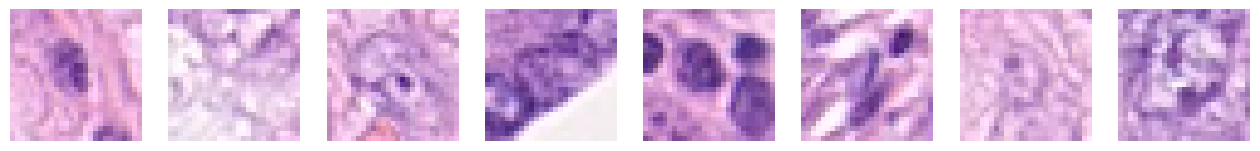

In [ ]:
r_inx = np.random.choice(100, 4)
rand_data = data.loc[r_inx,'image_path']
num_images = len(rand_data)
rows = 1
cols = num_images

plt.figure(figsize=(16,5))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(im, cmap='gray')
    plt.axis('off')

    
plt.show()

In [ ]:
rand_data

61    image_classification_data/patch_images/18821.png
61    image_classification_data/patch_images/12745.png
95    image_classification_data/patch_images/18857.png
95    image_classification_data/patch_images/12785.png
39    image_classification_data/patch_images/19055.png
39    image_classification_data/patch_images/12720.png
74    image_classification_data/patch_images/18836.png
74    image_classification_data/patch_images/12763.png
Name: image_path, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

Splitting into training and test sets

In [ ]:
train_data,test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data,val_data = train_test_split(train_data, test_size=0.25, random_state=42)

In [ ]:
print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 12168, Val Data: 4056, Test Data: 4056


## Build the Baseline for to classify if its is cancerous using Neural Network


In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

2023-05-12 03:52:17.938642: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2187)              0         
                                                                 
 dense (Dense)               (None, 256)               560128    
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    #rotation_range=20,  # Randomly rotate images by 20 degrees
    #width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    #height_shift_range=0.1,  # Randomly shift images vertically by 10%
    #zoom_range=0.1,  # Randomly zoom in on images by 10%
    #horizontal_flip=True  # Randomly flip images horizontally
)

batch_size = 32

train_generator = datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="image_path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 12168 validated image filenames belonging to 2 classes.
Found 4056 validated image filenames belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


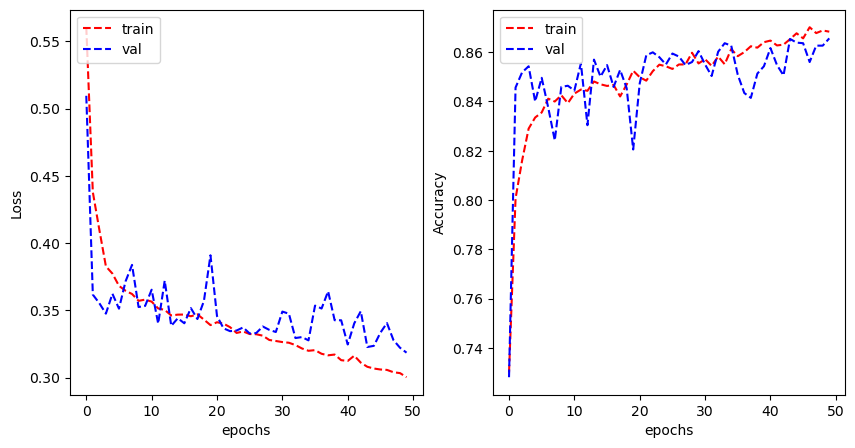

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], 'r--')
plt.plot(history.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


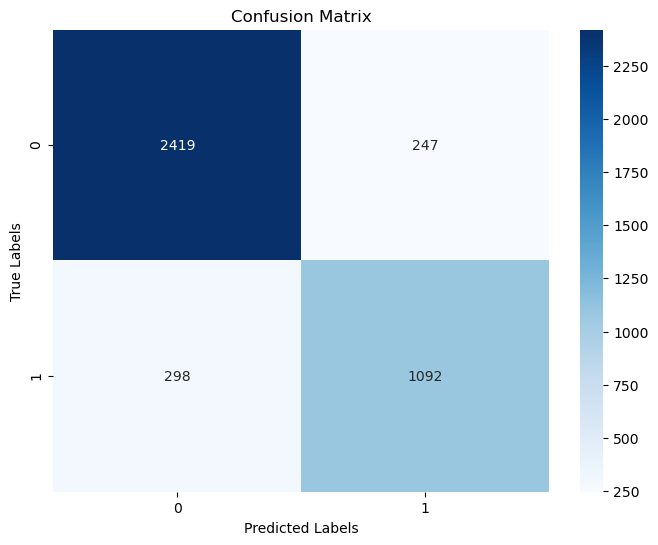

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2666
           1       0.82      0.79      0.80      1390

    accuracy                           0.87      4056
   macro avg       0.85      0.85      0.85      4056
weighted avg       0.86      0.87      0.87      4056



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8155339805825242
Recall: 0.7856115107913669
F1 Score: 0.8002931476731404
Specificity: 0.9073518379594899


Observation the model seems to be overfiting adding some regularization

## Baseline with increased epochs

In [ ]:
history_epoch = model.fit(train_generator, validation_data = validation_generator, epochs=60, verbose=0)

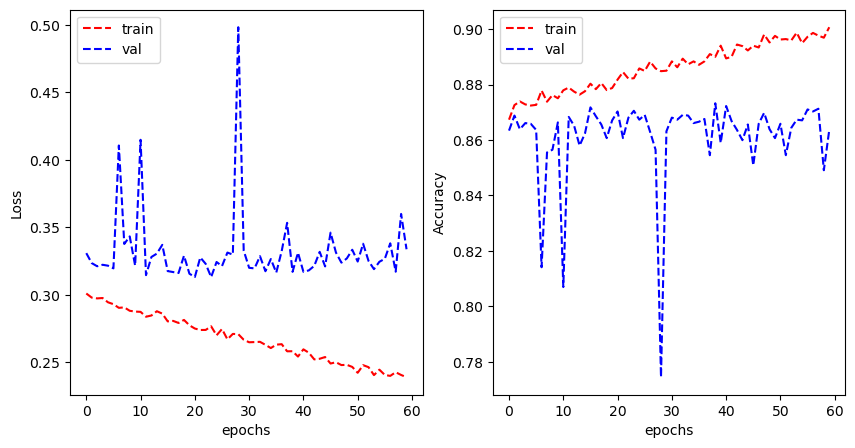

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_epoch.history['loss'], 'r--')
plt.plot(history_epoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_epoch.history['categorical_accuracy'], 'r--')
plt.plot(history_epoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Increasing the value of epochs by 10 has lead to the model being overfitted

## Baseline with less epochs

reducing epochs by 20

In [ ]:
history_lepoch = model.fit(train_generator, validation_data = validation_generator, epochs=30, verbose=0)

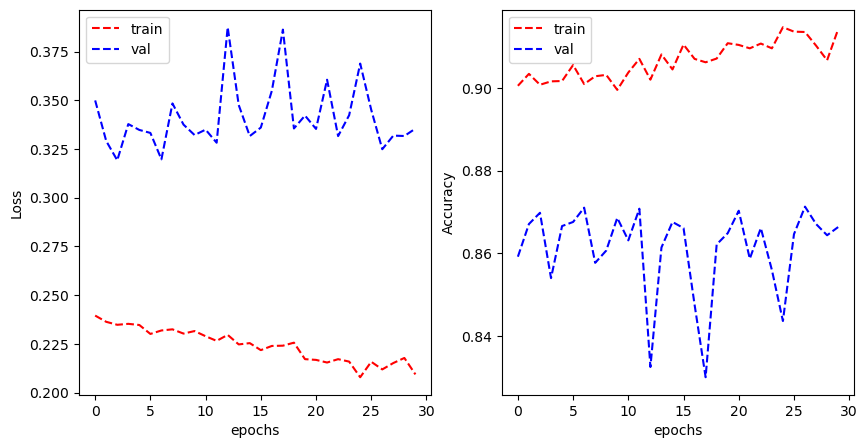

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_lepoch.history['loss'], 'r--')
plt.plot(history_lepoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_lepoch.history['categorical_accuracy'], 'r--')
plt.plot(history_lepoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

further reducing epochs by 10

In [ ]:
history_llepoch = model.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)

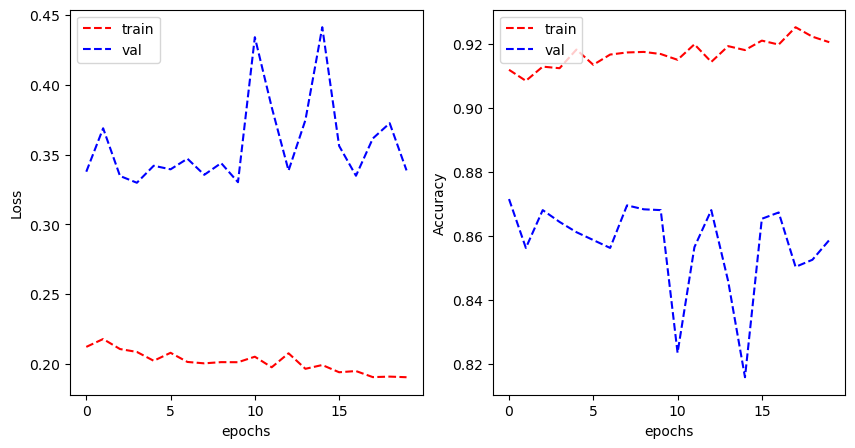

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_llepoch.history['loss'], 'r--')
plt.plot(history_llepoch.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_llepoch.history['categorical_accuracy'], 'r--')
plt.plot(history_llepoch.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

with the reducing epochs the gap between train and validation 
- this shows that the model is not able to generalise the on the data very well
- thus choosing epochs = 50

## Baseline with some regularization

In [ ]:
reg_lambda = 0.01

model_reg = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tf.keras.regularizers.l2(reg_lambda),activation='sigmoid')
])

In [ ]:
model_reg.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_reg = model_reg.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


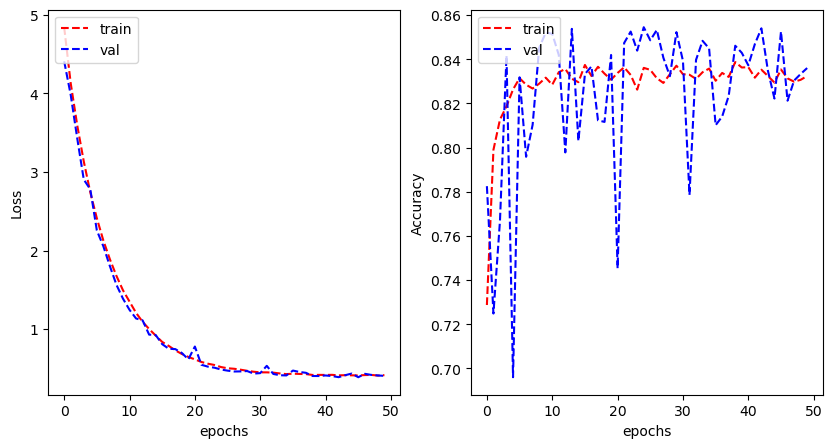

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_reg.history['loss'], 'r--')
plt.plot(history_reg.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_reg.history['categorical_accuracy'], 'r--')
plt.plot(history_reg.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


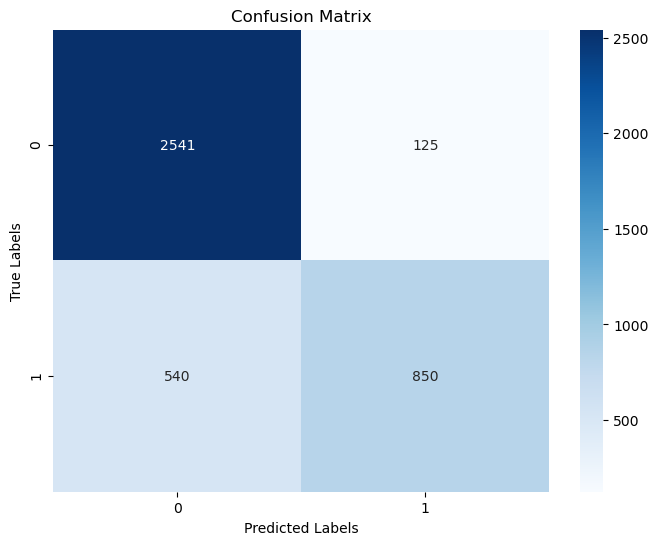

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2666
           1       0.87      0.61      0.72      1390

    accuracy                           0.84      4056
   macro avg       0.85      0.78      0.80      4056
weighted avg       0.84      0.84      0.83      4056



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_reg.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.8717948717948718
Recall: 0.6115107913669064
F1 Score: 0.7188160676532769
Specificity: 0.9531132783195799


## Baseline with some dropout

In [ ]:
reg_lambda = 0.01

model_drop = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(OUTPUT_CLASSES,activation='sigmoid')
])

In [ ]:
model_drop.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_drop = model_drop.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


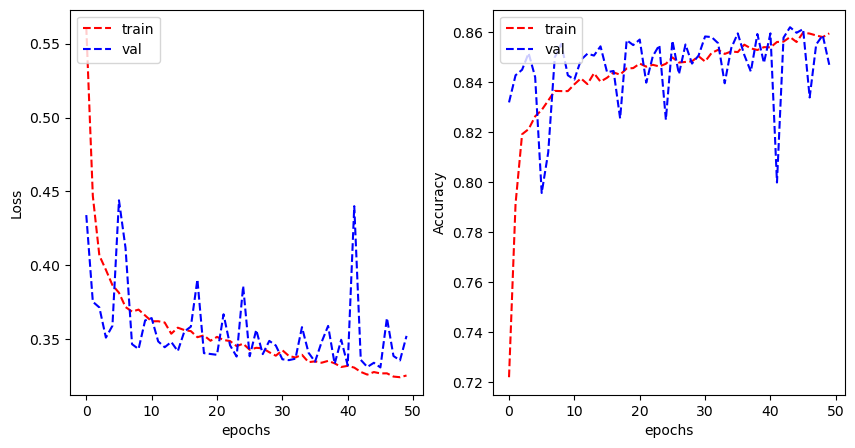

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_drop.history['loss'], 'r--')
plt.plot(history_drop.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_drop.history['categorical_accuracy'], 'r--')
plt.plot(history_drop.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


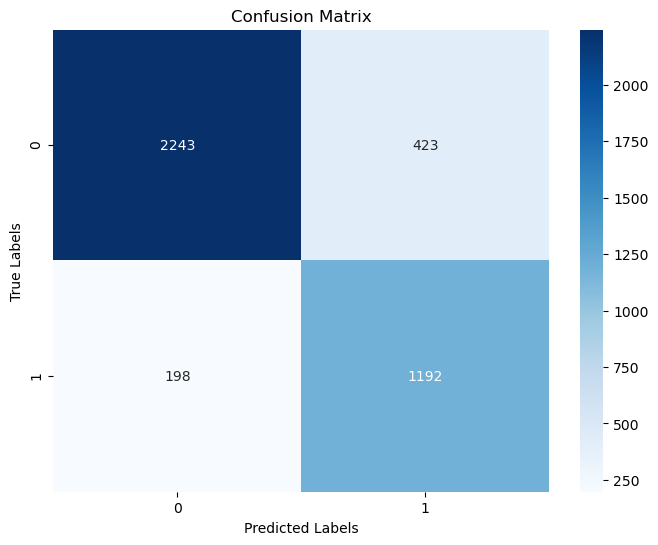

In [ ]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2666
           1       0.74      0.86      0.79      1390

    accuracy                           0.85      4056
   macro avg       0.83      0.85      0.84      4056
weighted avg       0.86      0.85      0.85      4056



In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_drop.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

confusion_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_labels, y_pred_labels)
recall = recall_score(y_true_labels, y_pred_labels)
f1 = f1_score(y_true_labels, y_pred_labels)

# Calculate specificity
specificity = confusion_matrix[0, 0] / (confusion_matrix[0, 0] + confusion_matrix[0, 1])

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)

Found 4056 validated image filenames belonging to 2 classes.
Precision: 0.7380804953560371
Recall: 0.8575539568345324
F1 Score: 0.7933444259567388
Specificity: 0.8413353338334584


## Baseline with reduced neurones

In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 16
OUTPUT_CLASSES = 2

In [ ]:
import tensorflow as tf

model_red = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [ ]:
model_red.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 2187)              0         
                                                                 
 dense_8 (Dense)             (None, 16)                35008     
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 35,042
Trainable params: 35,042
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_red.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_red = model_red.fit(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/Users/thomaspathrose/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


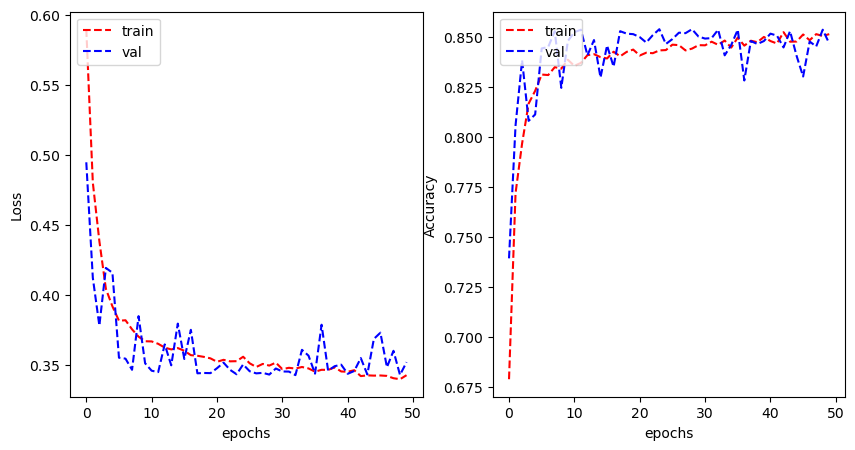

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_red.history['loss'], 'r--')
plt.plot(history_red.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_red.history['categorical_accuracy'], 'r--')
plt.plot(history_red.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## Using LENET CNN Model

In [ ]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

In [ ]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet_baseline = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid')
])

In [ ]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet_baseline.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet_base = model_leNet_baseline.fit_generator(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

/var/folders/sc/1ljq9fgn41xfwkqd6rv0dzgm0000gn/T/ipykernel_44188/3181470641.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_leNet_base = model_leNet_baseline.fit_generator(train_generator,


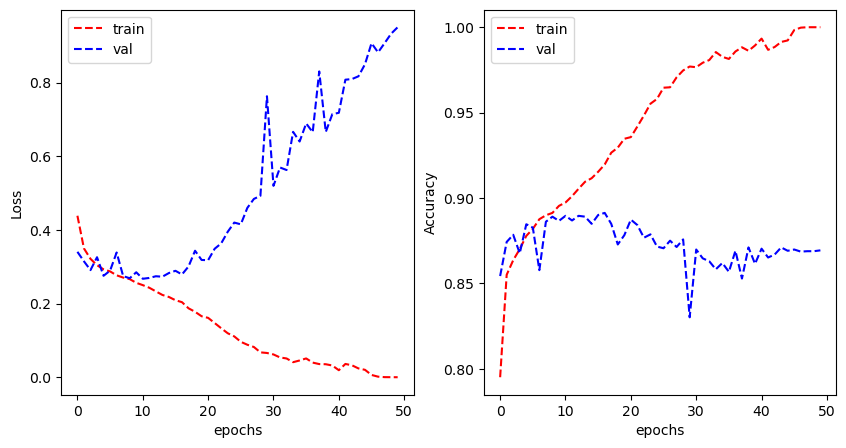

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet_base.history['loss'], 'r--')
plt.plot(history_leNet_base.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet_base.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet_base.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


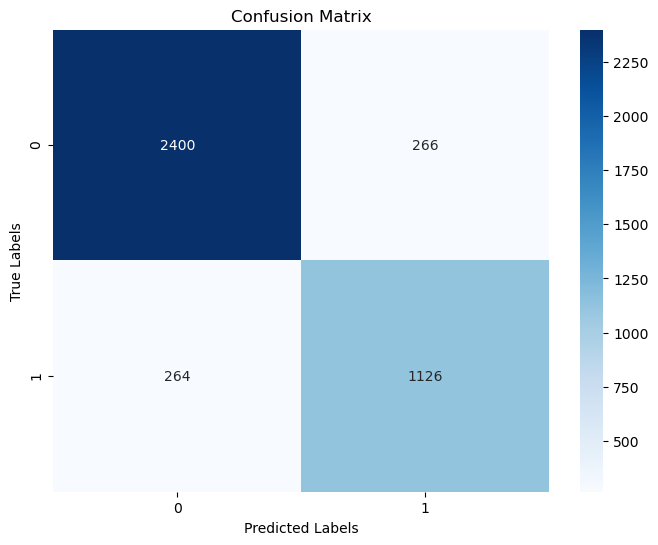

In [ ]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet_baseline.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2666
           1       0.81      0.81      0.81      1390

    accuracy                           0.87      4056
   macro avg       0.85      0.86      0.86      4056
weighted avg       0.87      0.87      0.87      4056



The model is overfitted so adding some dropout to it

## Using leNet CNN with dropout

In [ ]:
reg_lambda = 0.001
OUTPUT_CLASSES = 2

model_leNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(27, 27, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),
    
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [ ]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_leNet.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['categorical_accuracy'])

history_leNet = model_leNet.fit(train_generator, 
                                    validation_data = validation_generator, 
                                    epochs=50, verbose=0)

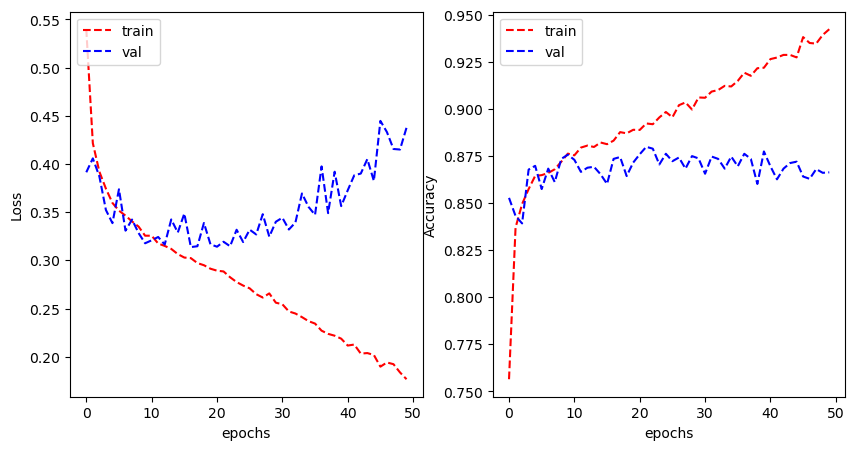

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_leNet.history['loss'], 'r--')
plt.plot(history_leNet.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_leNet.history['categorical_accuracy'], 'r--')
plt.plot(history_leNet.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

Found 4056 validated image filenames belonging to 2 classes.


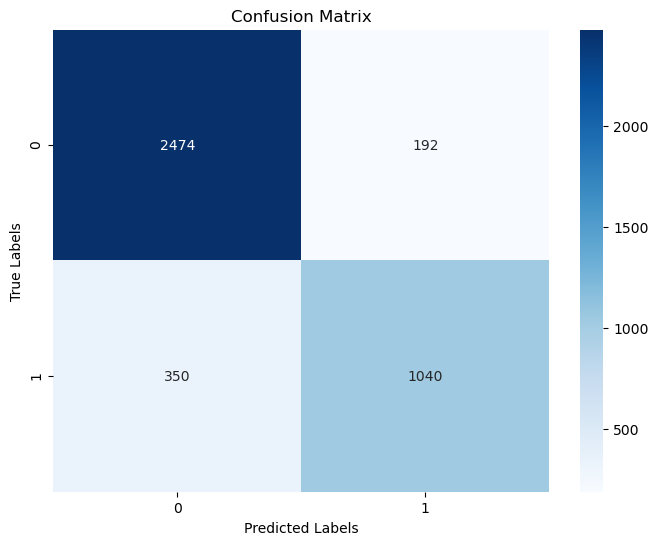

In [ ]:
from sklearn.metrics import confusion_matrix


test_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    directory='./',
    x_col="image_path",
    y_col="isCancerous",
    target_size=(27, 27),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_probs = model_leNet.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes

cm = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred_probs = model_leNet.predict(test_generator)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = test_generator.classes
report = classification_report(y_true_labels, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2666
           1       0.84      0.75      0.79      1390

    accuracy                           0.87      4056
   macro avg       0.86      0.84      0.85      4056
weighted avg       0.87      0.87      0.86      4056



## Using VGG architecture on the baseline

In [ ]:
import tensorflow as tf
OUTPUT_CLASSES=2

model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])

In [ ]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_1 = model_VGG_1.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)


In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_VGG_1.history['loss'], 'r--')
plt.plot(history_VGG_1.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_VGG_1.history['categorical_accuracy'], 'r--')
plt.plot(history_VGG_1.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()

## VGG with reduced convolutions

In [ ]:
import tensorflow as tf
OUTPUT_CLASSES=2

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax'),
])

In [ ]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_2 = model_VGG_2.fit(train_generator, validation_data = validation_generator, epochs=20, verbose=0)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_VGG_2.history['loss'], 'r--')
plt.plot(history_VGG_2.history['val_loss'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history_VGG_1.history['categorical_accuracy'], 'r--')
plt.plot(history_VGG_1.history['val_categorical_accuracy'], 'b--')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.show()